In [1]:
from pycalphad import Database, Model, variables as v

In [2]:
from pycalphad import equilibrium
import numpy as np

TDB = """
 ELEMENT A    GRAPHITE                   12.011     1054.0      5.7423 !
 ELEMENT B   BCC_A2                     55.847     4489.0     27.2797 !
 TYPE_DEFINITION % SEQ * !
 PHASE TEST % 1 1 !
 CONSTITUENT TEST : A,B: !
"""

my_phases_rose = ['TEST']
comps = ['A', 'B']#, 'LI', 'BE', 'B', 'C', 'N', 'O', 'F']
comps = sorted(comps)
conds = dict({v.T: 1000, v.P: 101325, v.N: 1})
#for comp in comps[1:]:
#    conds[v.X(comp)] = 1.0/float(len(comps))
conds[v.MU('B')] = -1855.3270574019966
#conds[v.X('A')] = 0.8
dbf = Database(TDB)
eqx = equilibrium(Database(TDB), comps, my_phases_rose, conds, calc_opts={'pdens': 10}, verbose=True)

Components: A B
Phases: TEST [done]
('Redundant phase:', CompositionSet(TEST, [ 0.44444444  0.55555556], NP=1.0, GM=-5711.742028618652))
Removing CompositionSet(TEST, [ 0.44444444  0.55555556], NP=nan, GM=-5711.742028618652)
('cur_conds', OrderedDict([('MU_B', array(-1855.3270574019966)), ('N', array(1.0)), ('P', array(101325.0)), ('T', array(1000.0))]))
('fixed_statevars', [('N', array(1.0)), ('P', array(101325.0)), ('T', array(1000.0))])
(array([1], dtype=int32), array([-1855.3270574]))
('prob.x0', array([  1.00000000e+00,   1.01325000e+05,   1.00000000e+03,
         5.55555556e-01,   4.44444444e-01,   2.00000000e+00]))
('cl', array([  1.00000000e+00,   1.01325000e+05,   1.00000000e+03,
         0.00000000e+00,   1.00000000e+00]))
('cu', array([  1.00000000e+00,   1.01325000e+05,   1.00000000e+03,
         0.00000000e+00,   1.00000000e+00]))
('x_in', array([  1.00000000e+00,   1.01325000e+05,   1.00000000e+03,
         5.55555556e-01,   4.44444444e-01,   2.00000000e+00]))
('total_obj

('l_constraints_tmp', array([ 1.]))
('x_in', array([  1.00000000e+00,   1.01325000e+05,   1.00000000e+03,
         5.55555530e-01,   4.44444470e-01,   1.00000000e+00]))
('total_obj', -4887.152225328657)
('l_constraints_tmp', array([ 1.]))
('x_in', array([  1.00000000e+00,   1.01325000e+05,   1.00000000e+03,
         5.55555555e-01,   4.44444445e-01,   1.00000000e+00]))
('total_obj', -4887.15222532867)
('l_constraints_tmp', array([ 1.]))
('x_in', array([  1.00000000e+00,   1.01325000e+05,   1.00000000e+03,
         5.55555556e-01,   4.44444444e-01,   1.00000000e+00]))
('total_obj', -4887.152225328669)
('l_constraints_tmp', array([ 1.]))
('x_in', array([  1.00000000e+00,   1.01325000e+05,   1.00000000e+03,
         5.55555556e-01,   4.44444444e-01,   1.00000000e+00]))
('total_obj', -4887.152225328669)
('x_in', array([  1.00000000e+00,   1.01325000e+05,   1.00000000e+03,
         5.55555556e-01,   4.44444444e-01,   1.00000000e+00]))
('total_obj', -4887.152225328668)
('l_constraints_tmp', 

('l_constraints_tmp', array([ 0.25497546]))
('x_in', array([  1.00000000e+00,   1.01325000e+05,   1.00000000e+03,
         5.55555299e-01,   4.44444701e-01,   5.55555894e-01,
         4.44444106e-01,   7.45024547e-01,   2.54975463e-01]))
('total_obj', -4887.1522741988765)
('l_constraints_tmp', array([ 0.74502455]))
('l_constraints_tmp', array([ 0.25497546]))
('x_in', array([  1.00000000e+00,   1.01325000e+05,   1.00000000e+03,
         5.55555299e-01,   4.44444701e-01,   5.55555894e-01,
         4.44444106e-01,   7.45024537e-01,   2.54975473e-01]))
('total_obj', -4887.152274198876)
('l_constraints_tmp', array([ 0.74502454]))
('l_constraints_tmp', array([ 0.25497547]))
('l_constraints_tmp', array([ 0.74502454]))
('l_constraints_tmp', array([ 0.25497546]))
('x_in', array([  1.00000000e+00,   1.01325000e+05,   1.00000000e+03,
         5.55555299e-01,   4.44444701e-01,   5.55555894e-01,
         4.44444106e-01,   7.45024537e-01,   2.54975463e-01]))
('total_obj', -4887.152225327354)
('l_con

         5.55535735e-01,   4.44464265e-01,   1.00000000e+00]))
('total_obj', -4887.152218714114)
('l_constraints_tmp', array([ 1.]))
('x_in', array([  1.00000000e+00,   1.01325000e+05,   1.00000000e+03,
         5.55545645e-01,   4.44454355e-01,   1.00000000e+00]))
('total_obj', -4887.152223675029)
('l_constraints_tmp', array([ 1.]))
('x_in', array([  1.00000000e+00,   1.01325000e+05,   1.00000000e+03,
         5.55550600e-01,   4.44449400e-01,   1.00000000e+00]))
('total_obj', -4887.152224915259)
('l_constraints_tmp', array([ 1.]))
('x_in', array([  1.00000000e+00,   1.01325000e+05,   1.00000000e+03,
         5.55553078e-01,   4.44446922e-01,   1.00000000e+00]))
('total_obj', -4887.152225225316)
('l_constraints_tmp', array([ 1.]))
('x_in', array([  1.00000000e+00,   1.01325000e+05,   1.00000000e+03,
         5.55554317e-01,   4.44445683e-01,   1.00000000e+00]))
('total_obj', -4887.152225302831)
('l_constraints_tmp', array([ 1.]))
('x_in', array([  1.00000000e+00,   1.01325000e+05,   1

('l_constraints_tmp', array([ 1.]))
('x_in', array([  1.00000000e+00,   1.01325000e+05,   1.00000000e+03,
         5.55555556e-01,   4.44444444e-01,   1.00000000e+00]))
('total_obj', -4887.152225328669)
('l_constraints_tmp', array([ 1.]))
('x_in', array([  1.00000000e+00,   1.01325000e+05,   1.00000000e+03,
         5.55555556e-01,   4.44444444e-01,   1.00000000e+00]))
('total_obj', -4887.152225328669)
('x_in', array([  1.00000000e+00,   1.01325000e+05,   1.00000000e+03,
         5.55555556e-01,   4.44444444e-01,   1.00000000e+00]))
('total_obj', -4887.152225328668)
('l_constraints_tmp', array([ 1.]))
Chemical Potentials [-4887.15222533 -4887.15222533]
[  5.00000000e-16   4.93461633e-21   5.00000000e-19   9.00000000e-16
   1.12500000e-15   5.00000500e-16]
[  1.00000000e+00   1.01325000e+05   1.00000000e+03   5.55555556e-01
   4.44444444e-01   1.00000000e+00]
Status: 0 b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified

('l_constraints_tmp', array([ 0.45148078]))
('l_constraints_tmp', array([ 0.54851922]))
('x_in', array([  1.00000000e+00,   1.01325000e+05,   1.00000000e+03,
         5.55712036e-01,   4.44287964e-01,   5.55391792e-01,
         4.44608208e-01,   4.51480776e-01,   5.48519224e-01]))
('total_obj', -4887.151791518971)
('l_constraints_tmp', array([ 0.45014651]))
('l_constraints_tmp', array([ 0.54985349]))
('x_in', array([  1.00000000e+00,   1.01325000e+05,   1.00000000e+03,
         5.55575442e-01,   4.44424558e-01,   5.55702412e-01,
         4.44297588e-01,   4.50146511e-01,   5.49853489e-01]))
('total_obj', -4887.152022665337)
('l_constraints_tmp', array([ 0.45003763]))
('l_constraints_tmp', array([ 0.54996237]))
('x_in', array([  1.00000000e+00,   1.01325000e+05,   1.00000000e+03,
         5.55561621e-01,   4.44438379e-01,   5.55555072e-01,
         4.44444928e-01,   4.50037628e-01,   5.49962372e-01]))
('total_obj', -4887.152225047766)
('l_constraints_tmp', array([ 0.44997104]))
('l_cons

('l_constraints_tmp', array([ 0.83626105]))
('l_constraints_tmp', array([ 0.16373895]))
('x_in', array([  1.00000000e+00,   1.01325000e+05,   1.00000000e+03,
         5.92787032e-01,   4.07212968e-01,   5.78684406e-01,
         4.21315594e-01,   8.36261053e-01,   1.63738947e-01]))
('total_obj', -4866.025711146176)
('l_constraints_tmp', array([ 0.83704331]))
('l_constraints_tmp', array([ 0.16295669]))
('x_in', array([  1.00000000e+00,   1.01325000e+05,   1.00000000e+03,
         5.65433632e-01,   4.34566368e-01,   5.53918824e-01,
         4.46081176e-01,   8.37043308e-01,   1.62956692e-01]))
('total_obj', -4885.767581858233)
('l_constraints_tmp', array([ 0.83820827]))
('l_constraints_tmp', array([ 0.16179173]))
('x_in', array([  1.00000000e+00,   1.01325000e+05,   1.00000000e+03,
         5.55773571e-01,   4.44226429e-01,   5.54081640e-01,
         4.45918360e-01,   8.38208269e-01,   1.61791731e-01]))
('total_obj', -4887.145637983826)
('l_constraints_tmp', array([ 0.83838857]))
('l_cons

('l_constraints_tmp', array([ 0.47070082]))
('l_constraints_tmp', array([ 0.52929918]))
('x_in', array([  1.00000000e+00,   1.01325000e+05,   1.00000000e+03,
         5.55555556e-01,   4.44444444e-01,   5.55555556e-01,
         4.44444444e-01,   4.70700822e-01,   5.29299178e-01]))
('total_obj', -4887.152225328669)
('l_constraints_tmp', array([ 0.47070082]))
('l_constraints_tmp', array([ 0.52929918]))
('x_in', array([  1.00000000e+00,   1.01325000e+05,   1.00000000e+03,
         5.55555556e-01,   4.44444444e-01,   5.55555556e-01,
         4.44444444e-01,   4.70700822e-01,   5.29299178e-01]))
('total_obj', -4887.152225328669)
('l_constraints_tmp', array([ 0.47070082]))
('l_constraints_tmp', array([ 0.52929918]))
('x_in', array([  1.00000000e+00,   1.01325000e+05,   1.00000000e+03,
         5.55555556e-01,   4.44444444e-01,   5.55555556e-01,
         4.44444444e-01,   4.70700822e-01,   5.29299178e-01]))
('total_obj', -4887.1522253286685)
Chemical Potentials [-4887.15222533 -4887.15222533]

('l_constraints_tmp', array([ 0.46587226]))
('l_constraints_tmp', array([ 0.53412774]))
('x_in', array([  1.00000000e+00,   1.01325000e+05,   1.00000000e+03,
         5.54992018e-01,   4.45007982e-01,   5.55132135e-01,
         4.44867865e-01,   4.65872258e-01,   5.34127742e-01]))
('total_obj', -4887.148122323199)
('l_constraints_tmp', array([ 0.47050886]))
('l_constraints_tmp', array([ 0.52949114]))
('x_in', array([  1.00000000e+00,   1.01325000e+05,   1.00000000e+03,
         5.55614684e-01,   4.44385316e-01,   5.55425910e-01,
         4.44574090e-01,   4.70508860e-01,   5.29491140e-01]))
('total_obj', -4887.152047791338)
('l_constraints_tmp', array([ 0.4707633]))
('l_constraints_tmp', array([ 0.5292367]))
('x_in', array([  1.00000000e+00,   1.01325000e+05,   1.00000000e+03,
         5.55577953e-01,   4.44422047e-01,   5.55553047e-01,
         4.44446953e-01,   4.70763302e-01,   5.29236698e-01]))
('total_obj', -4887.152221296366)
('l_constraints_tmp', array([ 0.47070734]))
('l_constr

('l_constraints_tmp', array([ 0.814838]))
('l_constraints_tmp', array([ 0.185162]))
('x_in', array([  1.00000000e+00,   1.01325000e+05,   1.00000000e+03,
         5.53823582e-01,   4.46176418e-01,   4.32876395e-01,
         5.67123605e-01,   8.14838003e-01,   1.85161997e-01]))
('total_obj', -4840.57437011898)
('l_constraints_tmp', array([ 0.83782556]))
('l_constraints_tmp', array([ 0.16217444]))
('x_in', array([  1.00000000e+00,   1.01325000e+05,   1.00000000e+03,
         5.38080232e-01,   4.61919768e-01,   5.29153241e-01,
         4.70846759e-01,   8.37825562e-01,   1.62174438e-01]))
('total_obj', -4880.957917951224)
('l_constraints_tmp', array([ 0.83626105]))
('l_constraints_tmp', array([ 0.16373895]))
('x_in', array([  1.00000000e+00,   1.01325000e+05,   1.00000000e+03,
         5.92787032e-01,   4.07212968e-01,   5.78684406e-01,
         4.21315594e-01,   8.36261053e-01,   1.63738947e-01]))
('total_obj', -4866.025711146173)
('l_constraints_tmp', array([ 0.83626105]))
('l_constrain

('l_constraints_tmp', array([ 0.47070093]))
('l_constraints_tmp', array([ 0.52929907]))
('x_in', array([  1.00000000e+00,   1.01325000e+05,   1.00000000e+03,
         5.55555567e-01,   4.44444433e-01,   5.55555574e-01,
         4.44444426e-01,   4.70700925e-01,   5.29299075e-01]))
('total_obj', -4887.152225328665)
('l_constraints_tmp', array([ 0.47070082]))
('l_constraints_tmp', array([ 0.52929918]))
('x_in', array([  1.00000000e+00,   1.01325000e+05,   1.00000000e+03,
         5.55555556e-01,   4.44444444e-01,   5.55555556e-01,
         4.44444444e-01,   4.70700822e-01,   5.29299178e-01]))
('total_obj', -4887.152225328669)
('l_constraints_tmp', array([ 0.47070082]))
('l_constraints_tmp', array([ 0.52929918]))
('x_in', array([  1.00000000e+00,   1.01325000e+05,   1.00000000e+03,
         5.55555556e-01,   4.44444444e-01,   5.55555556e-01,
         4.44444444e-01,   4.70700822e-01,   5.29299178e-01]))
('total_obj', -4887.152225328669)
('l_constraints_tmp', array([ 0.47070082]))
('l_cons

('l_constraints_tmp', array([ 0.00832453]))
('l_constraints_tmp', array([ 0.99167547]))
('x_in', array([  1.00000000e+00,   1.01325000e+05,   1.00000000e+03,
         5.69469705e-01,   4.30530295e-01,   4.66775182e-01,
         5.33224818e-01,   8.32453063e-03,   9.91675469e-01]))
('total_obj', -4756.5644875050875)
('l_constraints_tmp', array([ 0.4203393]))
('l_constraints_tmp', array([ 0.5796607]))
('x_in', array([  1.00000000e+00,   1.01325000e+05,   1.00000000e+03,
         5.62101573e-01,   4.37898427e-01,   5.10746206e-01,
         4.89253794e-01,   4.20339297e-01,   5.79660703e-01]))
('total_obj', -4867.356827842572)
('l_constraints_tmp', array([ 0.43407363]))
('l_constraints_tmp', array([ 0.56592637]))
('x_in', array([  1.00000000e+00,   1.01325000e+05,   1.00000000e+03,
         5.52109097e-01,   4.47890903e-01,   5.22439377e-01,
         4.77560623e-01,   4.34073627e-01,   5.65926373e-01]))
('total_obj', -4876.659726556229)
('l_constraints_tmp', array([ 0.44682955]))
('l_const

('l_constraints_tmp', array([ 0.83820827]))
('l_constraints_tmp', array([ 0.16179173]))
('x_in', array([  1.00000000e+00,   1.01325000e+05,   1.00000000e+03,
         5.55773571e-01,   4.44226429e-01,   5.54081640e-01,
         4.45918360e-01,   8.38208269e-01,   1.61791731e-01]))
('total_obj', -4887.145637983826)
('l_constraints_tmp', array([ 0.83838857]))
('l_constraints_tmp', array([ 0.16161143]))
('x_in', array([  1.00000000e+00,   1.01325000e+05,   1.00000000e+03,
         5.55554122e-01,   4.44445878e-01,   5.55339404e-01,
         4.44660596e-01,   8.38388575e-01,   1.61611425e-01]))
('total_obj', -4887.152098173653)
('l_constraints_tmp', array([ 0.83840883]))
('l_constraints_tmp', array([ 0.16159117]))
('x_in', array([  1.00000000e+00,   1.01325000e+05,   1.00000000e+03,
         5.55555198e-01,   4.44444802e-01,   5.55554937e-01,
         4.44445063e-01,   8.38408835e-01,   1.61591165e-01]))
('total_obj', -4887.152225325824)
Trying to improve poor solution
('x_in', array([  1.

('l_constraints_tmp', array([ 0.47070082]))
('l_constraints_tmp', array([ 0.52929918]))
('x_in', array([  1.00000000e+00,   1.01325000e+05,   1.00000000e+03,
         5.55555556e-01,   4.44444444e-01,   5.55555556e-01,
         4.44444444e-01,   4.70700822e-01,   5.29299178e-01]))
('total_obj', -4887.152225328669)
('l_constraints_tmp', array([ 0.47070082]))
('l_constraints_tmp', array([ 0.52929918]))
('x_in', array([  1.00000000e+00,   1.01325000e+05,   1.00000000e+03,
         5.55555556e-01,   4.44444444e-01,   5.55555556e-01,
         4.44444444e-01,   4.70700822e-01,   5.29299178e-01]))
('total_obj', -4887.1522253286685)
('l_constraints_tmp', array([ 0.47070082]))
('l_constraints_tmp', array([ 0.52929918]))
('x_in', array([  1.00000000e+00,   1.01325000e+05,   1.00000000e+03,
         5.55555556e-01,   4.44444444e-01,   5.55555556e-01,
         4.44444444e-01,   4.70700822e-01,   5.29299178e-01]))
('total_obj', -4887.1522253286685)
Chemical Potentials [-4887.15222533 -4887.15222533

('l_constraints_tmp', array([ 0.83820827]))
('l_constraints_tmp', array([ 0.16179173]))
('x_in', array([  1.00000000e+00,   1.01325000e+05,   1.00000000e+03,
         5.55773571e-01,   4.44226429e-01,   5.54081640e-01,
         4.45918360e-01,   8.38208269e-01,   1.61791731e-01]))
('total_obj', -4887.145637983827)
('l_constraints_tmp', array([ 0.83838857]))
('l_constraints_tmp', array([ 0.16161143]))
('x_in', array([  1.00000000e+00,   1.01325000e+05,   1.00000000e+03,
         5.55554122e-01,   4.44445878e-01,   5.55339404e-01,
         4.44660596e-01,   8.38388575e-01,   1.61611425e-01]))
('total_obj', -4887.152098173654)
('l_constraints_tmp', array([ 0.83840883]))
('l_constraints_tmp', array([ 0.16159117]))
('x_in', array([  1.00000000e+00,   1.01325000e+05,   1.00000000e+03,
         5.55555198e-01,   4.44444802e-01,   5.55554937e-01,
         4.44445063e-01,   8.38408835e-01,   1.61591165e-01]))
('total_obj', -4887.1522253258245)
Trying to improve poor solution
('x_in', array([  1

('l_constraints_tmp', array([ 0.47070082]))
('l_constraints_tmp', array([ 0.52929918]))
('x_in', array([  1.00000000e+00,   1.01325000e+05,   1.00000000e+03,
         5.55555556e-01,   4.44444444e-01,   5.55555556e-01,
         4.44444444e-01,   4.70700822e-01,   5.29299178e-01]))
('total_obj', -4887.152225328668)
Chemical Potentials [-4887.15222533 -4887.15222533]
[  5.00000000e-16   4.93461633e-21   5.00000000e-19   9.00000000e-16
   1.12500000e-15   9.00000000e-16   1.12500000e-15   1.06224812e-15
   9.44647121e-16]
[  1.00000000e+00   1.01325000e+05   1.00000000e+03   5.55555556e-01
   4.44444444e-01   5.55555556e-01   4.44444444e-01   4.70700822e-01
   5.29299178e-01]
Status: 0 b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Adding CompositionSet(TEST, [ 0.44444444  0.55555556], NP=0.3333333333333333, GM=-5711.742028618652) Driving force: 824.5898032899868
('Redundant phase:', CompositionSet(TEST

         4.44445063e-01,   8.38408835e-01,   1.61591165e-01]))
('total_obj', -4887.1522253258245)
('l_constraints_tmp', array([ 0.83235406]))
('l_constraints_tmp', array([ 0.16764594]))
('x_in', array([  1.00000000e+00,   1.01325000e+05,   1.00000000e+03,
         5.54733441e-01,   4.45266559e-01,   5.54717230e-01,
         4.45282770e-01,   8.32354063e-01,   1.67645937e-01]))
('total_obj', -4887.140771186963)
('l_constraints_tmp', array([ 0.00832453]))
('l_constraints_tmp', array([ 0.99167547]))
('x_in', array([  1.00000000e+00,   1.01325000e+05,   1.00000000e+03,
         5.69469705e-01,   4.30530295e-01,   4.66775182e-01,
         5.33224818e-01,   8.32453063e-03,   9.91675469e-01]))
('total_obj', -4756.5644875050875)
('l_constraints_tmp', array([ 0.00832453]))
('l_constraints_tmp', array([ 0.99167547]))
('x_in', array([  1.00000000e+00,   1.01325000e+05,   1.00000000e+03,
         5.69469705e-01,   4.30530295e-01,   4.66775182e-01,
         5.33224818e-01,   8.32453063e-03,   9.916

/home/rotis/anaconda/envs/calphadpy3/lib/python3.5/site-packages/dask/base.py:835: UserWarning: The get= keyword has been deprecated. Please use the scheduler= keyword instead with the name of the desired scheduler like 'threads' or 'processes'
  warnings.warn("The get= keyword has been deprecated. "


In [3]:
eqx.MU

<xarray.DataArray 'MU' (N: 1, P: 1, T: 1, MU_B: 1, component: 2)>
array([[[[[-4887.152225, -4887.152225]]]]])
Coordinates:
  * MU_B       (MU_B) float64 -1.855e+03
  * N          (N) float64 1.0
  * P          (P) float64 1.013e+05
  * T          (T) float64 1e+03
  * component  (component) <U1 'A' 'B'

In [4]:
eqx.X

<xarray.DataArray 'X' (N: 1, P: 1, T: 1, MU_B: 1, vertex: 3, component: 2)>
array([[[[[[ 0.555556,  0.444444],
           [      nan,       nan],
           [      nan,       nan]]]]]])
Coordinates:
  * MU_B       (MU_B) float64 -1.855e+03
  * N          (N) float64 1.0
  * P          (P) float64 1.013e+05
  * T          (T) float64 1e+03
  * vertex     (vertex) int64 0 1 2
  * component  (component) <U1 'A' 'B'

In [5]:
eqx.Y

<xarray.DataArray 'Y' (N: 1, P: 1, T: 1, MU_B: 1, vertex: 3, internal_dof: 2)>
array([[[[[[ 0.555556,  0.444444],
           [      nan,       nan],
           [      nan,       nan]]]]]])
Coordinates:
  * MU_B     (MU_B) float64 -1.855e+03
  * N        (N) float64 1.0
  * P        (P) float64 1.013e+05
  * T        (T) float64 1e+03
  * vertex   (vertex) int64 0 1 2
Dimensions without coordinates: internal_dof

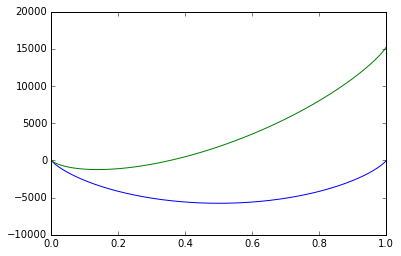

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(1e-9,1-1e-9,2000)
y = 1-x
gm = 8314.5*(np.log(x)*x + (y)*np.log(y))
ac = 0.8
mu = 8314.5*np.log(0.8)

trans_func = gm - (mu)*x - 8314.5*np.log(0.2)*x

plt.plot(x,gm, label='GM')
plt.plot(x, trans_func, label='L')

In [7]:
np.exp(-1855.3270574019966/8314.5)

0.80000000000000004

In [8]:
x[np.argmin(trans_func)]

0.13806903524112057

In [9]:
8314.5*np.log(0.8)

-1855.3270574019966

In [10]:
np.gradient(gm - mu*x)

array([-34.84262295, -31.95861028, -27.98537666, ...,  29.84163184,
        33.81486546,  36.69887813])

In [11]:
8314.5*(np.log(0.2) + 1)

-5067.1715229333267

In [12]:
8314.5*(np.log(0.8) + 1)

6459.1729425980029

In [13]:
np.gradient(gm)

array([-35.77075054, -32.88673787, -28.91350425, ...,  28.91350425,
        32.88673787,  35.77075054])

In [14]:
np.log(0.8)

-0.22314355131420971

In [15]:
8314.5*(np.log(0.8)+1)

6459.1729425980029

In [16]:
mu

-1855.3270574019966